##  Deep Neural Networks Project

In this project, you will be working with a real-world data set from the Las Vegas Metropolitan Police Department. The dataset  contains information about the reported incidents, including the time and location of the crime, type of incident, and number of persons involved. 

The dataset is downloaded from the public docket at: 
https://opendata-lvmpd.hub.arcgis.com

let's read the csv file and transform the data:

In [1]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
orig_df = pd.read_csv('../../datasets/LVMPD-Stats.csv', parse_dates=['ReportedOn'])

In [3]:
df = pd.read_csv('../../datasets/LVMPD-Stats.csv', parse_dates=['ReportedOn'],
                 usecols = ['X', 'Y', 'ReportedOn',
                            'Area_Command','NIBRSOffenseCode',
                            'VictimCount' ] )

df['DayOfWeek'] = df['ReportedOn'].dt.day_name()
df['Time' ]     = df['ReportedOn'].dt.hour
df.drop(columns = 'ReportedOn', inplace=True)




In [4]:
df.head()

,X,Y,Area_Command,NIBRSOffenseCode,VictimCount,DayOfWeek,Time
0,-115.087518,36.216702,NEAC,09C,1,Friday,15
1,-115.240172,36.189693,BAC,09A,1,Thursday,21
2,-115.143088,36.181329,DTAC,09A,0,Tuesday,15
3,-115.225014,36.117633,SVAC,09A,3,Thursday,14
4,-115.176708,36.095967,CCAC,09A,1,Thursday,10


In [5]:

df['X'] = df['X'] 
df['Y'] = df['Y'] 
df['Time'] = pd.factorize(df['Time'])[0]
df['DayOfWeek'] = pd.factorize(df['DayOfWeek'])[0]
df.Area_Command = pd.factorize(df['Area_Command'])[0]
df.VictimCount = pd.factorize(df['VictimCount'])[0]
df.NIBRSOffenseCode = pd.factorize(df['NIBRSOffenseCode'])[0]
df.dropna(inplace=True)


In [6]:
unnorm_df = df.copy()

In [7]:
df= df[['X', 'Y', 'Area_Command', 'NIBRSOffenseCode',
       'DayOfWeek', 'Time','VictimCount']]

In [8]:
# # Plot a histogram
# plt.hist(df['VictimCount'], bins=10, edgecolor='k', alpha=0.7)
# plt.xlabel('Number of People Involved')
# plt.ylabel('Frequency')
# plt.title('Histogram of Number of People Involved')
# plt.show()

# correlation_matrix = df.corr()

# # Create a heatmap to visualize the correlations
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

In [9]:
df.values.shape
df.head()

grouped = df.groupby("VictimCount").size().reset_index(name='Count')
print(grouped)


   VictimCount  Count
0            0    142
1            1    100
2            2      9
3            3     21
4            4      1
5            5      1
6            6      1


In [10]:
import pandas as pd



from sklearn.preprocessing import MinMaxScaler
column_name = 'X'
min_max_scaler = MinMaxScaler()
df[column_name] = min_max_scaler.fit_transform(df[[column_name]])

column_name = 'Y'
min_max_scaler = MinMaxScaler()
df[column_name] = min_max_scaler.fit_transform(df[[column_name]])

df.head()
unnorm_df.head()


,X,Y,Area_Command,NIBRSOffenseCode,VictimCount,DayOfWeek,Time
0,-115.087518,36.216702,0,0,0,0,0
1,-115.240172,36.189693,1,1,0,1,1
2,-115.143088,36.181329,2,1,1,2,0
3,-115.225014,36.117633,3,1,2,1,2
4,-115.176708,36.095967,4,1,0,1,3


In [11]:
unnorm_df.head()

,X,Y,Area_Command,NIBRSOffenseCode,VictimCount,DayOfWeek,Time
0,-115.087518,36.216702,0,0,0,0,0
1,-115.240172,36.189693,1,1,0,1,1
2,-115.143088,36.181329,2,1,1,2,0
3,-115.225014,36.117633,3,1,2,1,2
4,-115.176708,36.095967,4,1,0,1,3


# Goal
The goal is to build a predictive model that is trained on the following data:
* latitude and longitude (location)
* Hour of the day
* Day of the week
* Area-of-command code: The police designation of the bureau of the operation.
* Classification code for the crime committed
  
The predicted variable is the number of persons involved in the accident.


## Task 1
* print a few rows of the values in the dataframe ``df`` and explain what each column of data means. 
* identify the input and target variables
* what is the range of values in each column? Do you need to scale, shift or normalize your data? 


In [12]:
df.head(5)

,X,Y,Area_Command,NIBRSOffenseCode,DayOfWeek,Time,VictimCount
0,0.663899,0.594478,0,0,0,0,0
1,0.552832,0.580495,1,1,1,1,0
2,0.623467,0.576165,2,1,2,0,1
3,0.563860,0.543189,3,1,1,2,2
4,0.599006,0.531973,4,1,1,3,0


 **Input Variables**
* X and Y : reperesents the Latitude and Longitude
* Area_Command : police designation of the bureau of the operation
* NIBRSOffenseCode : encoded value for the crime commited
* DayOfWeek : Represents the reported day of the week which has been dervied from ReportedOn Column from orginal data
* Time : Represents the reported time of the crime which has been dervied from ReportedOn Column from orginal data

 **Output Variables**
* VictimCount : reperenets number of people involved in the crime


In [13]:
min_max_values = df.apply(lambda col: f"{col.min()} to {col.max()}")
print(min_max_values)

print("I have done the normalization it has scale down but there is no much difference \n other than in architecure - usage of Activations functions")



X                   0.0 to 1.0
Y                   0.0 to 1.0
Area_Command           0 to 11
NIBRSOffenseCode        0 to 2
DayOfWeek               0 to 6
Time                   0 to 23
VictimCount             0 to 6
dtype: object
I have done the normalization it has scale down but there is no much difference 
 other than in architecure - usage of Activations functions


## Task 2 

* Create two `DataLoader` objects for training and testing based on the input and output variables. Pick a reasonable batch size and verify the shape of data by iterating over the one dataset and printing the shape of the batched data. 

In [14]:
from torch.utils.data import DataLoader, TensorDataset

input = ["X", "Y", "Time", "Area_Command", "NIBRSOffenseCode", "DayOfWeek"]
output = "VictimCount"

inputs = torch.tensor(df[input].values, dtype=torch.float32)
outputs = torch.tensor(df[output].values, dtype=torch.float32)

batch_size = 32
dataset = TensorDataset(inputs, outputs)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


for batch in train_loader:
    inputs, outputs = batch
    print("Input shape:", inputs.shape)
    print("Output shape:", outputs.shape)
    break
outputs = outputs.unsqueeze(1)
print("Output shape:", outputs.shape)

Input shape: torch.Size([32, 6])
Output shape: torch.Size([32])
Output shape: torch.Size([32, 1])


## Task 3
In this task you will try to predict number of crime victims as a **real number**. Therefore the machine learning problem is a **regression** problem. 

* Define the proper loss function for this task
* what should the size of the predicted output be?
* explain your choice of architecture, including how many layers you will be using
* define an optimizer for training this model, choose a proper learning rate 
* write a training loop that obtains a batch out of the  training data and calculates the forward and backward passes over the neural network. Call the optimizer to update the weights of the neural network.
* write a for loop that continues the training over a number of epochs. At the end of each epoch, calculate the ``MSE`` error on the test data and print it.
* is your model training well? Adjust the learning rate, hidden size of the network, and try different activation functions and number of layers to achieve the best accuracy and report it. 

**3.1.** Define the proper loss function for this task

Answer : The loss function for this task is MSE since we are predicting one number and squaring the differences ensures that larger errors are penalized more, which is often appropriate for regression problems.

**3.2.** What should the size of the predicted output be?

 Answer : The size of the predicted outpur is just **one**

**3.3.**  Explain your choice of architecture, including how many layers you will be using?

Answer : The choice of architecture has 3 layers where the activations fucntions are ReLU my data is between 0 and 1 where RELU has define well and the number of layers choice is based on the trial and error.

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming you have loaded your data into tensors 'inputs' and 'outputs'

input_size = 6
hidden_size = 128
output_size = 1
learning_rate = 0.03
num_epochs = 100

batch_size = 25

# Create a DataLoader for the dataset
dataset = TensorDataset(inputs, outputs)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define the deep regression model
class DeepRegressionModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DeepRegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc4(x)
        return x

**3.4.** Write a training loop that obtains a batch out of the  training data and calculates the forward and backward passes over the neural network. Call the optimizer to update the weights of the neural network.


In [16]:
model = DeepRegressionModel(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

model.train()
for epoch in range(num_epochs):
    for batch in train_loader:
        inputs, targets = batch

        ## forward passed 
        outputs = model(inputs)

        ## Calcautes the loss
        loss = criterion(outputs, targets)

        ## backward pass 
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()}')

Epoch [1/100] - Loss: 2.6498842239379883
Epoch [2/100] - Loss: 364.5086669921875
Epoch [3/100] - Loss: 1.7749319076538086
Epoch [4/100] - Loss: 35.04444122314453
Epoch [5/100] - Loss: 33.10480880737305
Epoch [6/100] - Loss: 23.261524200439453
Epoch [7/100] - Loss: 14.96045207977295
Epoch [8/100] - Loss: 9.495118141174316
Epoch [9/100] - Loss: 6.226133823394775
Epoch [10/100] - Loss: 4.240637302398682
Epoch [11/100] - Loss: 2.906400203704834
Epoch [12/100] - Loss: 2.0190584659576416
Epoch [13/100] - Loss: 1.528120517730713
Epoch [14/100] - Loss: 1.4475655555725098
Epoch [15/100] - Loss: 1.6355127096176147
Epoch [16/100] - Loss: 1.6622146368026733
Epoch [17/100] - Loss: 1.5443285703659058
Epoch [18/100] - Loss: 1.4202353954315186
Epoch [19/100] - Loss: 1.3519296646118164
Epoch [20/100] - Loss: 1.334205150604248
Epoch [21/100] - Loss: 1.3430033922195435
Epoch [22/100] - Loss: 1.3555301427841187
Epoch [23/100] - Loss: 1.3599967956542969
Epoch [24/100] - Loss: 1.359013319015503
Epoch [25/10

**3.5.** Write a for loop that continues the training over a number of epochs. At the end of each epoch, calculate the ``MSE`` error on the test data and print it

In [17]:
model.eval()
total_loss = 0.0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()

mean_loss = total_loss / len(test_loader)
print(f'Mean Test Loss: {mean_loss}')

Mean Test Loss: 1.3747408390045166


**3.6.** Is your model training well? Adjust the learning rate, hidden size of the network, and try different activation functions and number of layers to achieve the best accuracy and report it. 

Yes, due to normalized data which is from 0 to 1 the activation functions ReLU worked fine

## Task 4 

In this task, you will try to predict the number of crime victims as a **class number**. Therefore the machine learning problem is a **classification** problem. 

* Repeat all the steps in task 3. Specifically, pay attention to the differences with regression.
* How would you find the number of classes on the output data?
* How is the architecture different?
* How is the loss function different?
* Calculate the Accuracy for test data as the number of correct classified outputs divided by the total number of test data in each epoch. Report it at the end of each epoch
* Try a few variations of learning rate, hidden dimensions, layers, etc. What is the best accuracy that you can get? 

**4.1** 
Repeated all the taks defined with the regression model - instead of one ouptut made classes and classifed the data


**4.2** 
unique_classes = np.unique(df['VictimCount'])
so its 7 for our program

**4.3** 
Instead of one single output value we have different classes 
And the loss function is diffenent it ha crossentropy commonly used loss function for multi-class classification


Issue with this model is test accuary is just around 50% to 60% becuase of **Class Imbalance** there are very less data for the few classes so there are multiple ways to tackle this issue 
* Use oversampling - minority class
* Use differnet loss function like Penalized Models
* Changing Performance Metric

In [18]:
#### Code with normal Classification model classifying as 7 different classes###

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define the input columns and the target column
input_cols = ["X", "Y", "Time", "Area_Command", "NIBRSOffenseCode", "DayOfWeek"]
output_col = "VictimCount"  # Assuming this is the original numeric column

# Create tensors for inputs and original numeric outputs
inputs = torch.tensor(df[input_cols].values, dtype=torch.float32)
original_outputs = torch.tensor(df[output_col].values, dtype=torch.float32)

# Define the number of classes (7 classes, VictimCount from 0 to 6)
num_classes = 7  # Update the number of classes

# Define batch size
batch_size = 32

# Create a DataLoader for the dataset
dataset = TensorDataset(inputs, original_outputs)  # Use original numeric outputs
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model architecture for classification into 7 classes
class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Set hyperparameters
input_size = 6  # Number of input features
hidden_size = 128  # Number of units in each hidden layer
learning_rate = 0.001
num_epochs = 100

# Create the model, loss function, and optimizer
model = ClassificationModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Cross-Entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0

    for batch in train_loader:
        inputs, targets = batch

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets.long())  # Use .long() for target values

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()} - Accuracy: {accuracy}')

# Evaluate the model on the test data
model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

test_accuracy = total_correct / total_samples
print(f'Test Accuracy: {test_accuracy}')


Epoch [1/100] - Loss: 1.2559235095977783 - Accuracy: 0.35
Epoch [2/100] - Loss: 1.2999846935272217 - Accuracy: 0.5227272727272727
Epoch [3/100] - Loss: 1.010837435722351 - Accuracy: 0.509090909090909
Epoch [4/100] - Loss: 1.5672250986099243 - Accuracy: 0.5181818181818182
Epoch [5/100] - Loss: 1.0298408269882202 - Accuracy: 0.5272727272727272
Epoch [6/100] - Loss: 1.2127517461776733 - Accuracy: 0.5136363636363637
Epoch [7/100] - Loss: 1.1092036962509155 - Accuracy: 0.5272727272727272
Epoch [8/100] - Loss: 1.0073333978652954 - Accuracy: 0.5181818181818182
Epoch [9/100] - Loss: 1.1846197843551636 - Accuracy: 0.5272727272727272
Epoch [10/100] - Loss: 1.2589150667190552 - Accuracy: 0.5272727272727272
Epoch [11/100] - Loss: 1.1225082874298096 - Accuracy: 0.5363636363636364
Epoch [12/100] - Loss: 0.9484278559684753 - Accuracy: 0.509090909090909
Epoch [13/100] - Loss: 1.0281842947006226 - Accuracy: 0.5272727272727272
Epoch [14/100] - Loss: 1.3308765888214111 - Accuracy: 0.5363636363636364
Epoc

Try **RandomSample oversampling** the minority classes and performing the normal classification but again the **accuary is bad becuase its 1.0** that means oversampling is not helping the model.Its weaking the system.


In [19]:
## Try RandomSample oversampling the minority classes
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Define the input columns and the target column
input_cols = ["X", "Y", "Time", "Area_Command", "NIBRSOffenseCode", "DayOfWeek"]
output_col = "VictimCount"  # Assuming this is the original numeric column

# Create tensors for inputs and original numeric outputs
inputs = torch.tensor(df[input_cols].values, dtype=torch.float32)
original_outputs = torch.tensor(df[output_col].values, dtype=torch.float32)

# Define the number of classes (7 classes, VictimCount from 0 to 6)
num_classes = 7  # Update the number of classes

# Define batch size
batch_size = 25

# Create a DataLoader for the dataset
dataset = TensorDataset(inputs, original_outputs)  # Use original numeric outputs

# Use RandomOverSampler to balance the class distribution
oversampler = RandomOverSampler(sampling_strategy='minority')
inputs_resampled, outputs_resampled = oversampler.fit_resample(inputs, original_outputs)

# Convert the resampled data to PyTorch tensors
inputs_resampled = torch.tensor(inputs_resampled, dtype=torch.float32)
outputs_resampled = torch.tensor(outputs_resampled, dtype=torch.float32)

# Split the resampled data into training and test sets
train_size = int(0.8 * len(inputs_resampled))
test_size = len(inputs_resampled) - train_size
train_dataset = TensorDataset(inputs_resampled[:train_size], outputs_resampled[:train_size])
test_dataset = TensorDataset(inputs_resampled[train_size:], outputs_resampled[train_size:])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model architecture for classification into 7 classes
class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Set hyperparameters
input_size = 6  # Number of input features
hidden_size = 128  # Number of units in each hidden layer
learning_rate = 0.001
num_epochs = 100

# Create the model, loss function, and optimizer
model = ClassificationModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Cross-Entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0

    for batch in train_loader:
        inputs, targets = batch

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets.long())  # Use .long() for target values

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples
    print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()} - Accuracy: {accuracy}')

# Evaluate the model on the test data
model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

test_accuracy = total_correct / total_samples
print(f'Test Accuracy: {test_accuracy}')


Epoch [1/100] - Loss: 1.2584832906723022 - Accuracy: 0.3795180722891566
Epoch [2/100] - Loss: 1.6060179471969604 - Accuracy: 0.48493975903614456
Epoch [3/100] - Loss: 0.9398120045661926 - Accuracy: 0.5150602409638554
Epoch [4/100] - Loss: 1.3390687704086304 - Accuracy: 0.5481927710843374
Epoch [5/100] - Loss: 1.2308404445648193 - Accuracy: 0.5602409638554217
Epoch [6/100] - Loss: 1.0093319416046143 - Accuracy: 0.5873493975903614
Epoch [7/100] - Loss: 1.6298658847808838 - Accuracy: 0.5873493975903614
Epoch [8/100] - Loss: 0.8036497235298157 - Accuracy: 0.5783132530120482
Epoch [9/100] - Loss: 1.0392779111862183 - Accuracy: 0.5903614457831325
Epoch [10/100] - Loss: 1.052701711654663 - Accuracy: 0.6114457831325302
Epoch [11/100] - Loss: 0.7719486951828003 - Accuracy: 0.5873493975903614
Epoch [12/100] - Loss: 0.8843835592269897 - Accuracy: 0.5783132530120482
Epoch [13/100] - Loss: 1.1821895837783813 - Accuracy: 0.6204819277108434
Epoch [14/100] - Loss: 0.8211321234703064 - Accuracy: 0.5993

The final approach was using **RandomForest** with Random Sampling to increase the accaury which gives about **87%** acccaury.

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler


# Define the input columns and the target column
input_cols = ["X", "Y", "Time", "Area_Command", "NIBRSOffenseCode", "DayOfWeek"]
output_col = "VictimCount"

# Create feature matrix (X) and target vector (y)
X = df[input_cols]
y = df[output_col]

# Initialize and apply RandomOverSampler to balance class distribution
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.8743718592964824


## Task 5

### Reflect on your results

* Write a paragraph about your experience with tasks 3 and 4. How do you compare the results? Which one worked better? Why?
* Write a piece of code that finds an example of a  miss-classification. Calculate the probabilities for the output classes and plot them in a bar chart. Also, indicate what is the correct class label.

Regression model was better i guess because the loss was reducing when compared to Classification and Classification had much more complications becuase of the **Class Imbalance** and also very small dataset, so going ahead with regression was easy compared to Classification. But again Regression model was also not stable enough.


In [21]:
#### Code with normal Classification model classifying as 7 different classes###

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Define the input columns and the target column
input_cols = ["X", "Y", "Time", "Area_Command", "NIBRSOffenseCode", "DayOfWeek"]
output_col = "VictimCount"  # Assuming this is the original numeric column

# Create tensors for inputs and original numeric outputs
inputs = torch.tensor(df[input_cols].values, dtype=torch.float32)
original_outputs = torch.tensor(df[output_col].values, dtype=torch.float32)

# Define the number of classes (7 classes, VictimCount from 0 to 6)
num_classes = 7  # Update the number of classes

# Define batch size
batch_size = 32

# Create a DataLoader for the dataset
dataset = TensorDataset(inputs, original_outputs)  # Use original numeric outputs
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Model architecture for classification into 7 classes
class ClassificationModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Set hyperparameters
input_size = 6  # Number of input features
hidden_size = 128  # Number of units in each hidden layer
learning_rate = 0.001
num_epochs = 100

# Create the model, loss function, and optimizer
model = ClassificationModel(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()  # Cross-Entropy loss for classification
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    total_correct = 0
    total_samples = 0

    for batch in train_loader:
        inputs, targets = batch

        # Forward pass
        outputs = model(inputs)

        # Compute the loss
        loss = criterion(outputs, targets.long())  # Use .long() for target values

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

    accuracy = total_correct / total_samples
    # print(f'Epoch [{epoch+1}/{num_epochs}] - Loss: {loss.item()} - Accuracy: {accuracy}')

# Evaluate the model on the test data
model.eval()
total_correct = 0
total_samples = 0
with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == targets).sum().item()
        total_samples += targets.size(0)

test_accuracy = total_correct / total_samples
# print(f'Test Accuracy: {test_accuracy}')


Misclassified Data:
tensor([0.6594, 0.5878, 0.0000, 0.0000, 1.0000, 2.0000])
True Label: Class 1.0
Predicted Label: Class 0


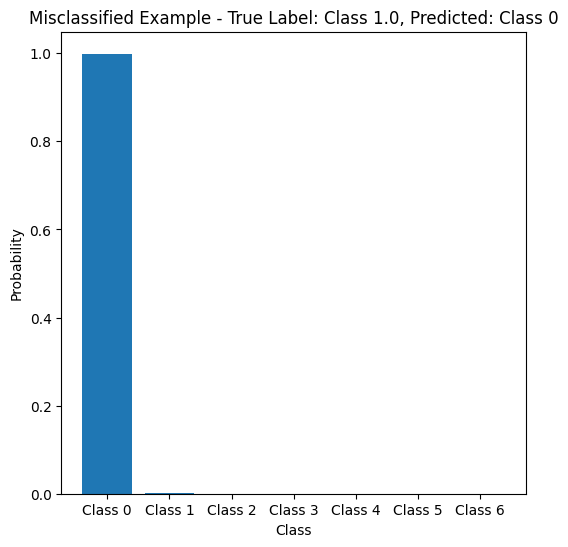

In [22]:
import matplotlib.pyplot as plt
model.eval()
misclassified_example = None
predicted_probabilities = None
true_label = None

with torch.no_grad():
    for batch in test_loader:
        inputs, targets = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        # Check for misclassification
        if misclassified_example is None:
            misclassified_indices = (predicted != targets).nonzero()  # Find misclassified examples
            if misclassified_indices.numel() > 0:
                misclassified_index = misclassified_indices[0].item()  # Get the index of the first misclassified example
                misclassified_example = inputs[misclassified_index]  # Store the input of the misclassified example
                predicted_probabilities = torch.softmax(outputs[misclassified_index], dim=0)  # Calculate class probabilities
                true_label = targets[misclassified_index].item()  # Get the true label

# Print the misclassified data, true label, and predicted label
if misclassified_example is not None:
    print('Misclassified Data:')
    print(misclassified_example)
    print(f'True Label: Class {true_label}')
    print(f'Predicted Label: Class {predicted[0]}')  # Predicted label for the misclassified example

# Plot the predicted class probabilities for the misclassified example
if misclassified_example is not None:
    class_labels = [f'Class {i}' for i in range(num_classes)]

    plt.figure(figsize=(6, 6))
    plt.bar(class_labels, predicted_probabilities)
    plt.title(f'Misclassified Example - True Label: Class {true_label}, Predicted: Class {predicted[0]}')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()
else:
    print('No misclassified examples found in the test dataset.')


## Task 6: Exploring the patterns in raw data

* Plot the crime incidents as a `scatter` plot using the corrdinates. Use the color property of each datapoint to indicate the day of the week. Is there a pattern in the plot?
* Now make a new scatter plot and use the color property of each datapoint to indicate the number of persons involved in the incident. Is there a pattern here?
* use numpy (or pandas if you like) to sort the number of crimes reported by the day of the week. What days are most frequent?


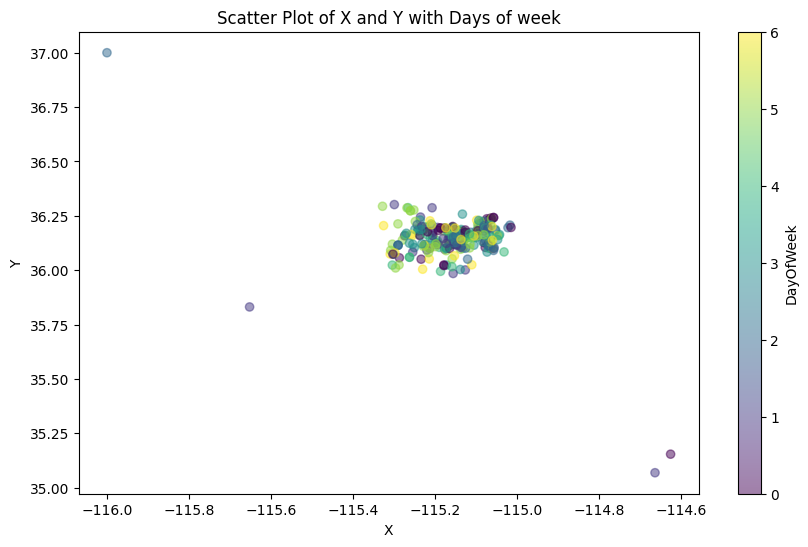

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

X = unnorm_df['X']
Y = unnorm_df['Y']
DayOfWeek = unnorm_df['DayOfWeek']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=DayOfWeek, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='DayOfWeek')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y with Days of week')
plt.show()


*The graph indicates that the majority of crimes occur in a specific geographic area around coordinates -115.2, 36. Furthermore, it shows that the day of the week does not significantly influence the crime rate, with most incidents happening on weekdays.

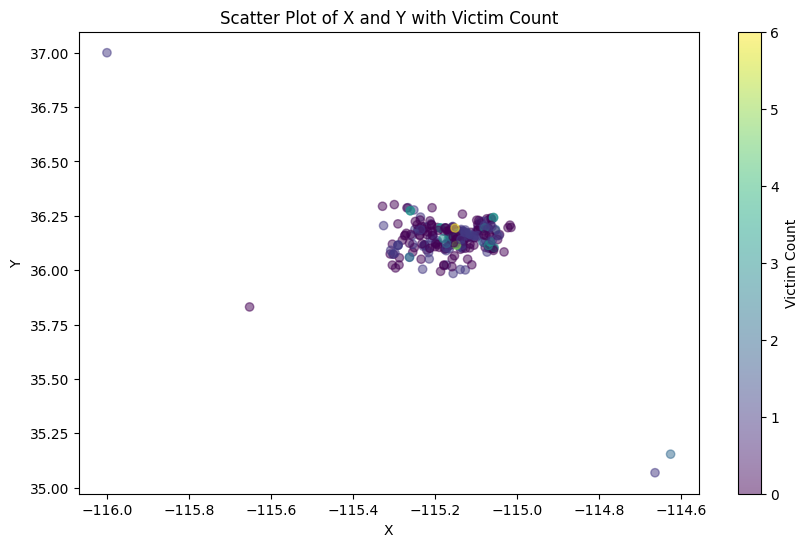

In [24]:
X = unnorm_df['X']
Y = unnorm_df['Y']
VictimCount = unnorm_df['VictimCount']

plt.figure(figsize=(10, 6))
plt.scatter(X, Y, c=VictimCount, cmap='viridis', marker='o', alpha=0.5)
plt.colorbar(label='Victim Count')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X and Y with Victim Count')
plt.show()


The data reveals that crimes primarily occur when there are either 0 or 1 victims involved, and they are concentrated in a consistent area with coordinates around -115.2, 36.25


In [25]:
import pandas as pd
day_of_week_counts = df['DayOfWeek'].value_counts().reset_index()
day_of_week_counts.columns = ['DayOfWeek', 'Count']
day_of_week_counts = day_of_week_counts.sort_values(by='Count', ascending=False)
print(day_of_week_counts)


   DayOfWeek  Count
0          4     51
1          3     44
2          5     43
3          0     40
4          1     37
5          2     32
6          6     28


In [26]:
# from sklearn.metrics import f1_score

# # Make predictions on the test set
# model.eval()
# all_predictions = []
# true_labels = []

# with torch.no_grad():
#     for batch in test_loader:
#         inputs, targets = batch
#         outputs = model(inputs)
#         _, predicted = torch.max(outputs, 1)
#         all_predictions.extend(predicted.cpu().numpy())
#         true_labels.extend(targets.cpu().numpy())

# # Calculate the F1-score for the test set
# f1 = f1_score(true_labels, all_predictions, average='weighted')

# print(f'Weighted F1-Score: {f1:.2f}')
